In [2]:
from pathlib import Path
import cv2 as cv
from matplotlib import pyplot as plt
import openslide
import numpy as np
import os

thispath = Path.cwd().resolve()

In [3]:
def check_corners(img):
    """
    This function checks the corner pixels of an image and returns the BGR values for the background.

    Parameters
    ----------
    img (numpy.ndarray): Image data

    Returns
    -------
    background_pixel (numpy.ndarray): BGR values for the background
    """
    cropped_image = img.copy()
    width, height, _ = cropped_image.shape
    cropped_image = cropped_image[100:width-100, 100:height-1]
    width, height, _ = cropped_image.shape
    top_left = img[0, 0, :]
    top_right = img[width-1, 0, :]
    bottom_left = img[0, height-1, :]
    bottom_right = img[width-1, height-1, :]
    most_frequent = np.argmax(np.bincount([np.sum(top_left), np.sum(top_right), np.sum(bottom_left), np.sum(bottom_right)]))

    if most_frequent == np.sum(top_left):
        return top_left
    
    elif most_frequent == np.sum(top_right):
        return top_right

    elif most_frequent == np.sum(bottom_left):
        return bottom_left
    
    elif most_frequent == np.sum(bottom_right):
        return bottom_right


def available_magnifications(mpp, level_downsamples):
	mpp = float(mpp)
	if (mpp<0.26):
		magnification = 40
	else:
		magnification = 20
	
	mags = []
	for l in level_downsamples:
		mags.append(magnification/l)
	
	return mags

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000031172000359336.svs
((153384, 75452), (38346, 18863), (9586, 4715), (2396, 1178))
0.25180000000000002
[40.0, 10.0, 2.4997359951233955, 0.6246699581804647]
Top_left


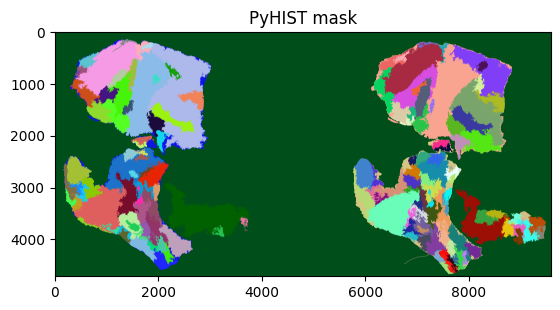

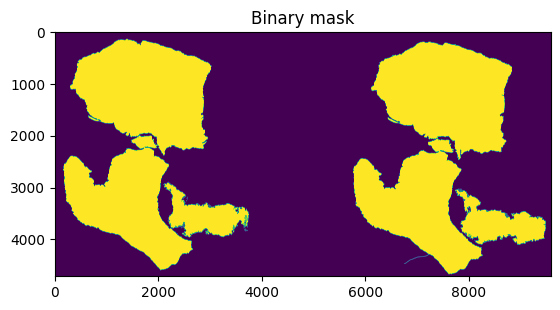

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000032301600414125.svs
((119520, 60777), (29880, 15194), (7470, 3798), (3735, 1899))
0.25280000000000002
[40.0, 9.999917731359984, 2.4998148833765272, 1.2499074416882636]
Top_left


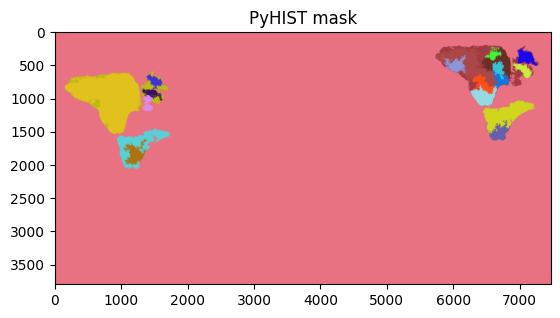

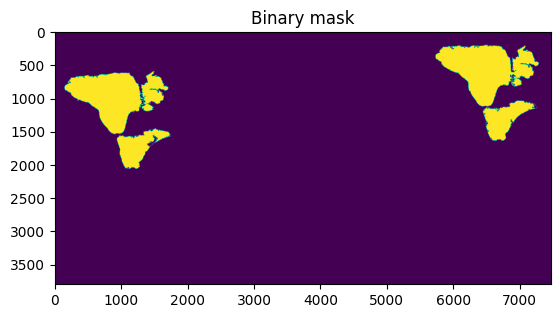

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000030438500320103.svs
((149400, 65765), (37350, 16441), (9337, 4110), (2334, 1027))
0.25180000000000002
[40.0, 9.999923971139445, 2.499838029926679, 0.6247739585378796]
Top_left


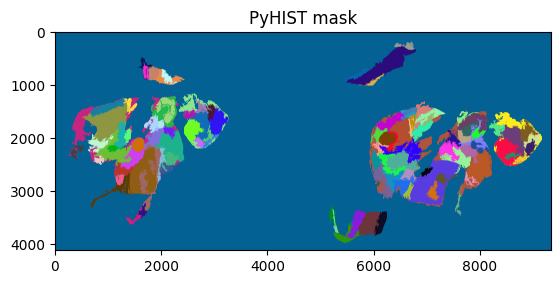

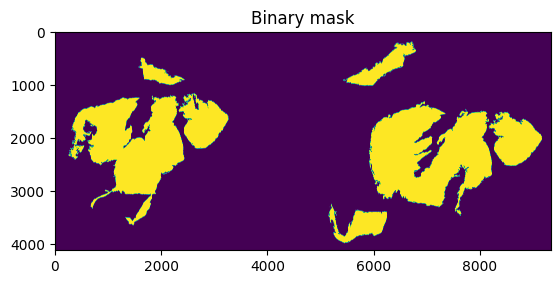

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000031340300367677.svs
((141432, 88973), (35358, 22243), (8839, 5560), (2209, 1390))
0.25209999999999999
[40.0, 9.999943802860436, 2.4997466499539325, 0.6248305959509457]
Top_left


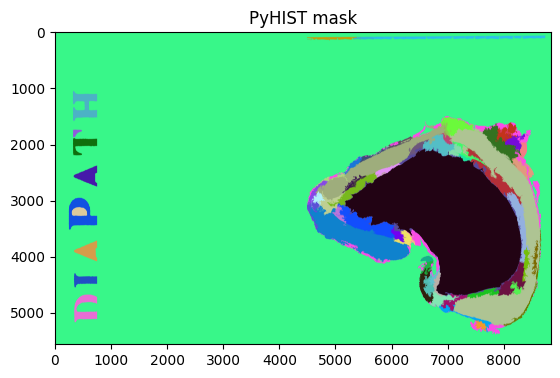

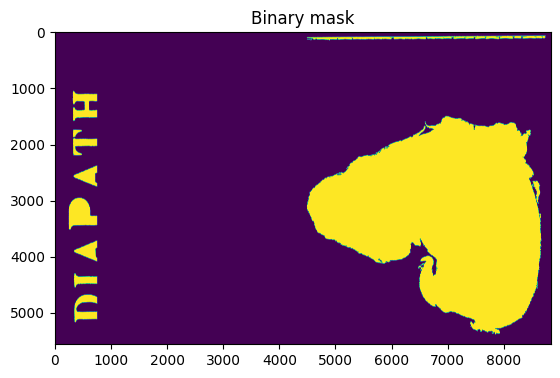

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000030303300314209.svs
((57853, 42223), (14463, 10555), (3615, 2638))
0.50049999999999994
[20.0, 4.999779155108691, 1.2496375171338154]
Top_left


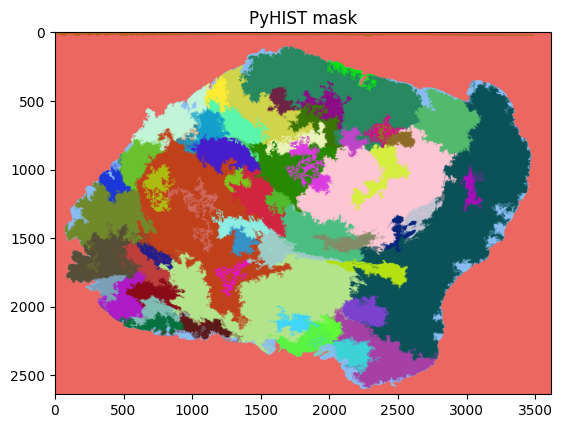

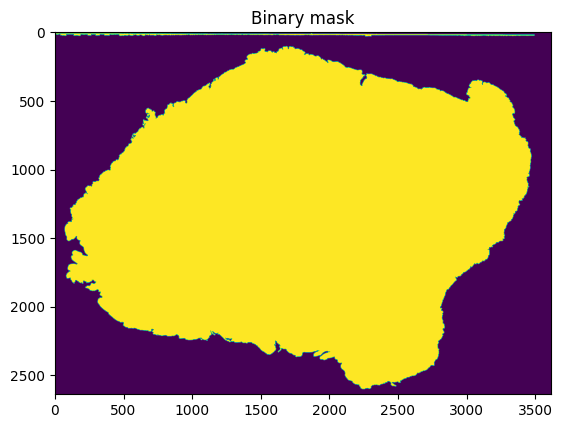

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000031913700394408.svs
((153384, 73684), (38346, 18421), (9586, 4605), (2396, 1151))
0.25180000000000002
[40.0, 10.0, 2.499866946812103, 0.624833683500957]
Top_left


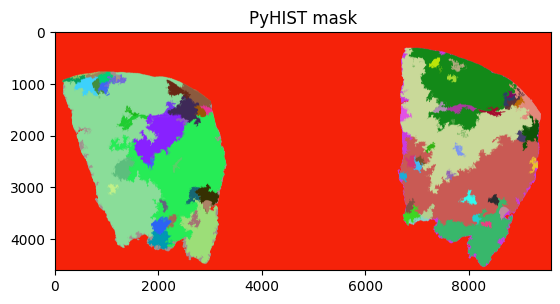

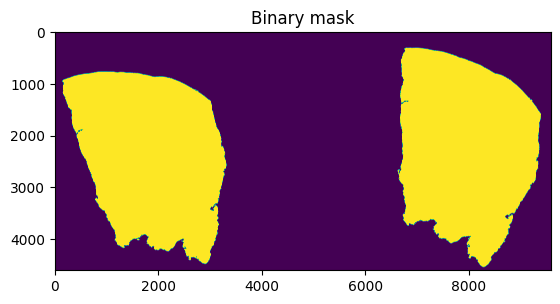

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000031292100364431.svs
((81672, 67669), (20418, 16917), (5104, 4229), (2552, 2114))
0.25180000000000002
[40.0, 9.99992611037632, 2.499785197307464, 1.24974480658082]
Top_left


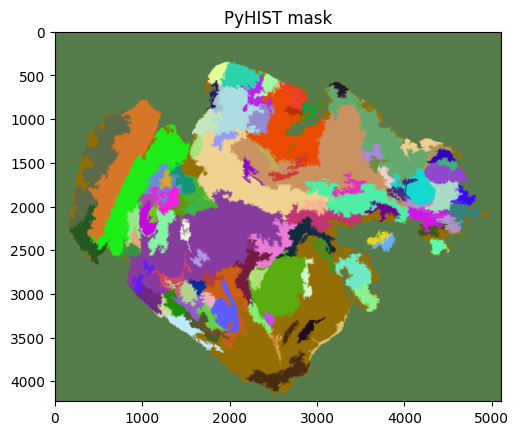

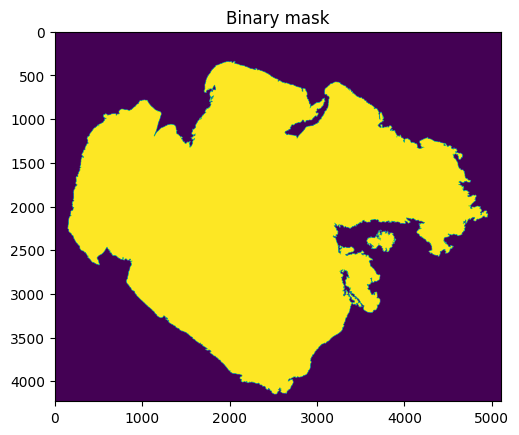

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000031962500399091.svs
((155376, 79186), (38844, 19796), (9711, 4949), (2427, 1237))
0.25209999999999999
[40.0, 9.999873713455832, 2.499968428363958, 0.624832423668742]
Top_left


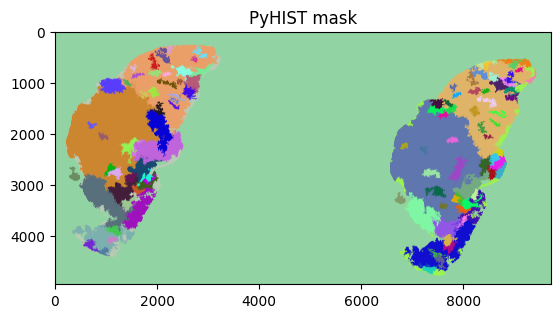

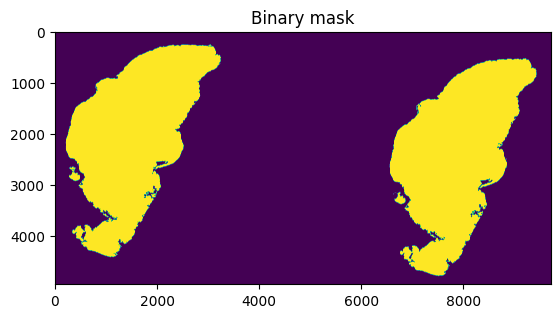

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000033629400505445.svs
((123504, 81164), (30876, 20291), (7719, 5072), (3859, 2536))
0.25180000000000002
[40.0, 10.0, 2.4998151753369973, 1.249826625357936]
Top_left


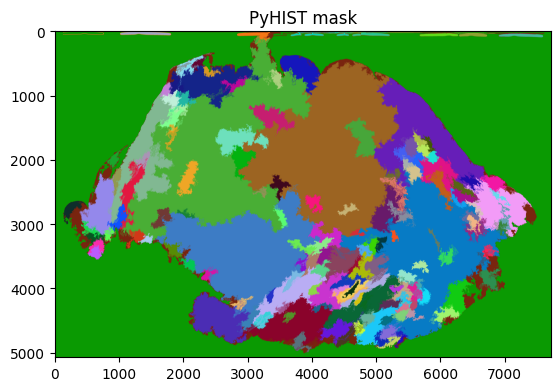

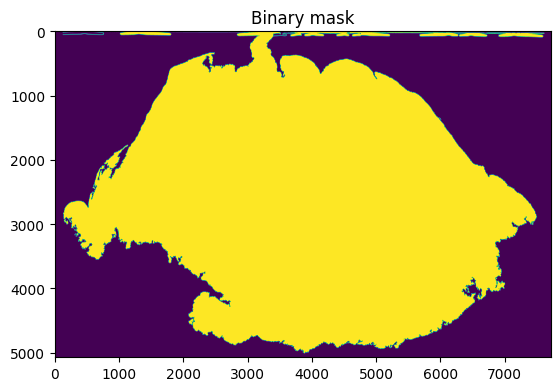

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000033782700519217.svs
((135456, 82822), (33864, 20705), (8466, 5176), (2116, 1294))
0.25180000000000002
[40.0, 9.999879257676193, 2.499909441070286, 0.624903532184402]
Top_left


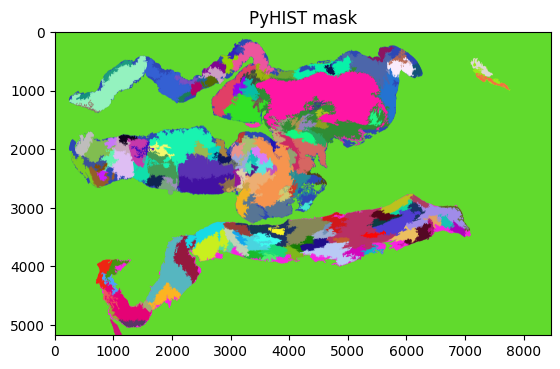

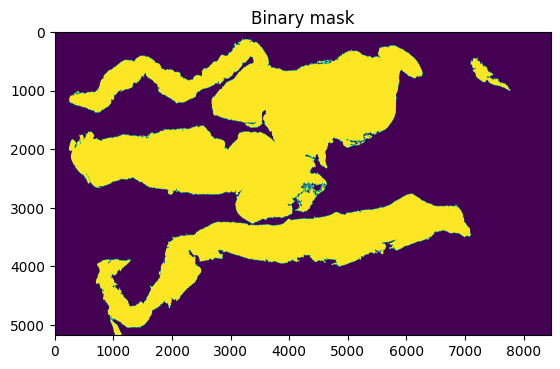

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000031542100377935.svs
((211152, 65839), (52788, 16459), (13197, 4114), (3299, 1028))
0.25209999999999999
[40.0, 9.999772166318586, 2.499715181941775, 0.6247531746687603]
Top_left


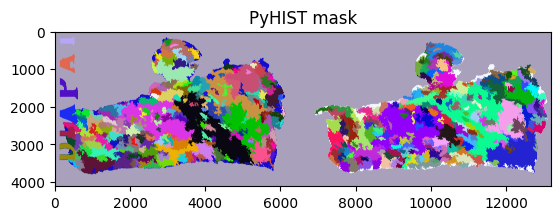

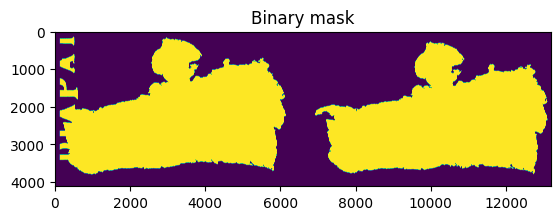

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000031505500375294.svs
((121512, 54838), (30378, 13709), (7594, 3427), (3797, 1713))
0.25209999999999999
[40.0, 9.999817641373527, 2.4997809359385896, 1.2497080781109793]
Top_left


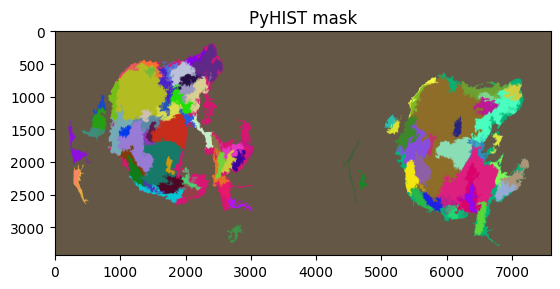

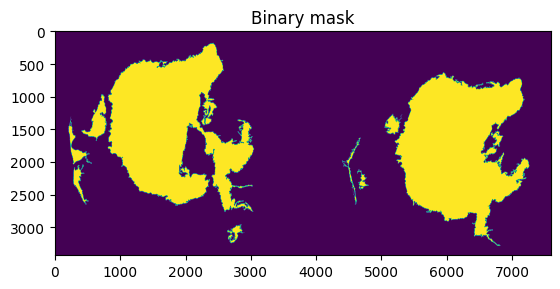

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000032368400420532.svs
((141432, 70155), (35358, 17538), (8839, 4384), (2209, 1096))
0.25280000000000002
[40.0, 9.999786183155509, 2.4997332937803134, 0.6248272580408711]
Top_left


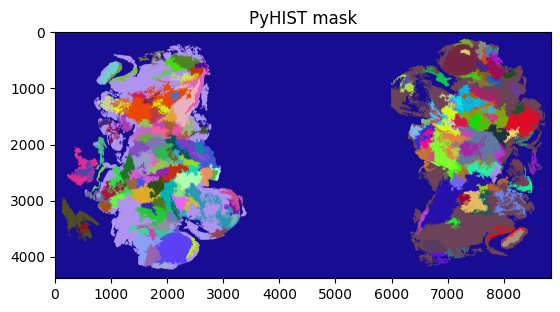

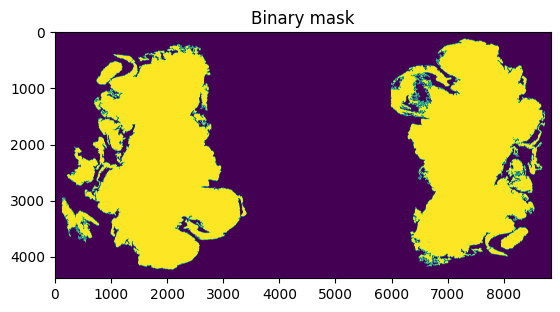

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000032026400399851.svs
((153384, 57799), (38346, 14449), (9586, 3612), (2396, 903))
0.25209999999999999
[40.0, 9.999740473203858, 2.4997834144776774, 0.6248806554652039]
Top_left


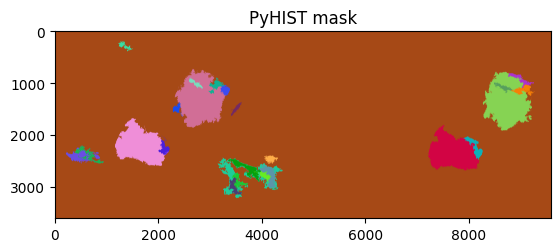

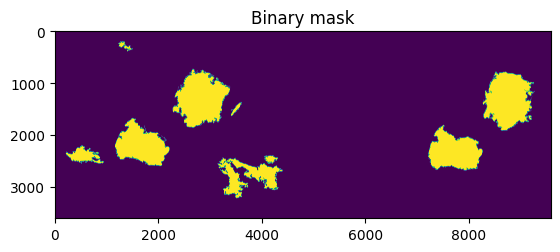

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000031839400392558.svs
((85656, 58360), (21414, 14590), (5353, 3647), (2676, 1823))
0.25180000000000002
[40.0, 10.0, 2.4997119025133423, 1.2495678501904224]
Top_left


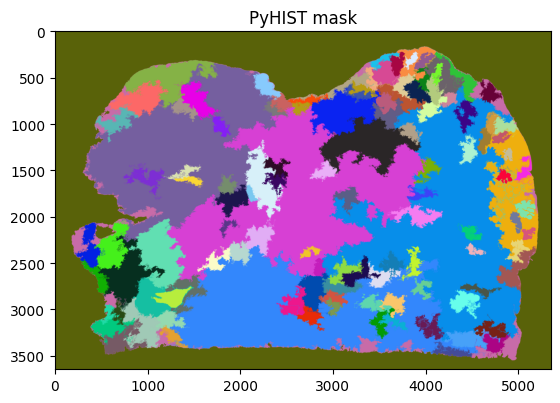

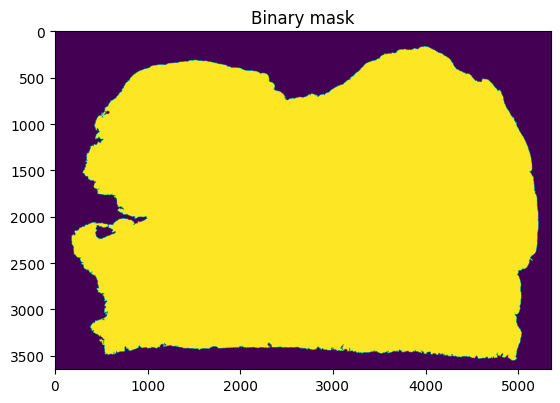

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000031505500375292.svs
((133464, 55826), (33366, 13956), (8341, 3489), (2085, 872))
0.25209999999999999
[40.0, 9.999820868786385, 2.4998802910633273, 0.6248430423898896]
Top_left


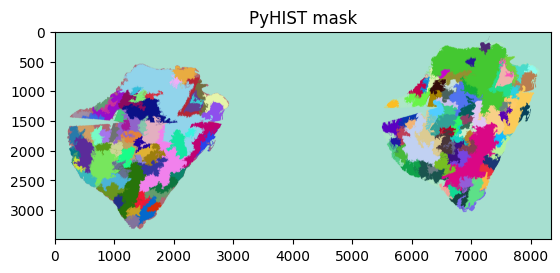

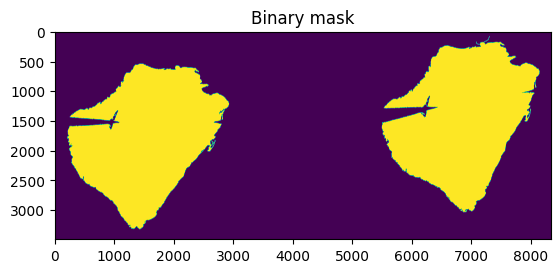

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000032368400420530.svs
((179280, 81344), (44820, 20336), (11205, 5084), (2801, 1271))
0.25280000000000002
[40.0, 10.0, 2.5, 0.6249721094203221]
Top_left


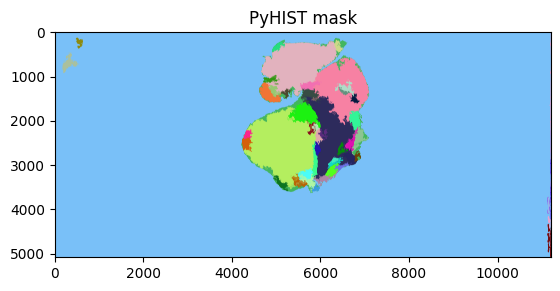

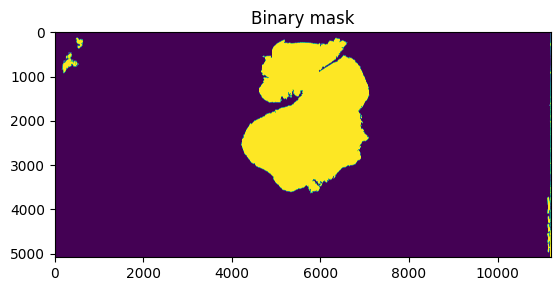

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000030732500335034.svs
((75696, 29620), (18924, 7405), (4731, 1851), (2365, 925))
0.50229999999999997
[20.0, 5.0, 1.249915591869809, 0.6247229066017659]
Top_left


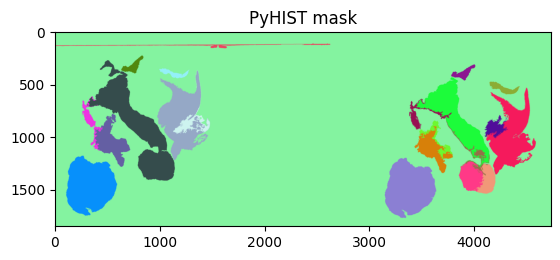

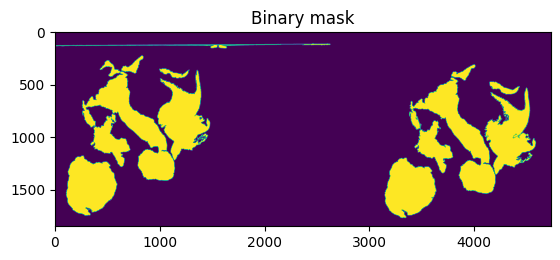

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000033782700519215.svs
((151392, 86200), (37848, 21550), (9462, 5387), (2365, 1346))
0.25180000000000002
[40.0, 10.0, 2.4998839853357464, 0.6247309000433503]
Top_left


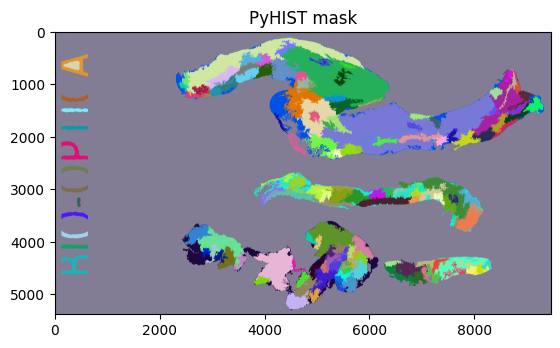

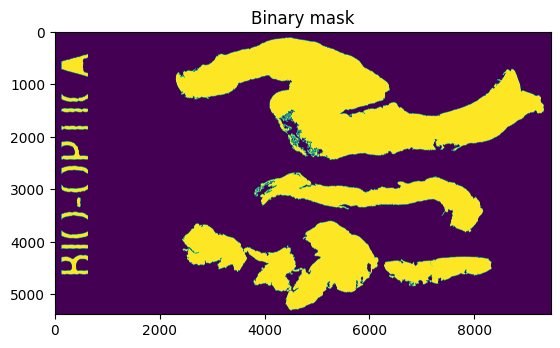

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000031539500377278.svs
((79680, 61192), (19920, 15298), (4980, 3824), (2490, 1912))
0.25180000000000002
[40.0, 10.0, 2.4998365692619466, 1.2499182846309733]
Top_left


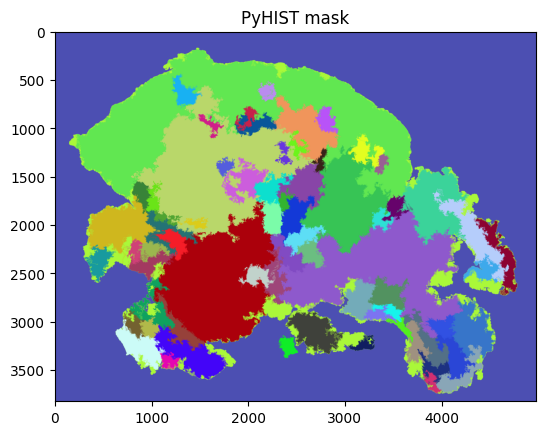

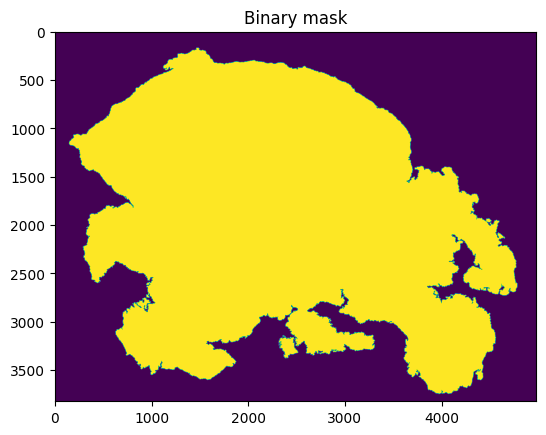

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000030490000322447.svs
((103737, 46176), (25934, 11544), (6483, 2886), (3241, 1443))
0.50049999999999994
[20.0, 4.999975900478617, 1.2499457739859736, 0.6249246802828647]
Top_left


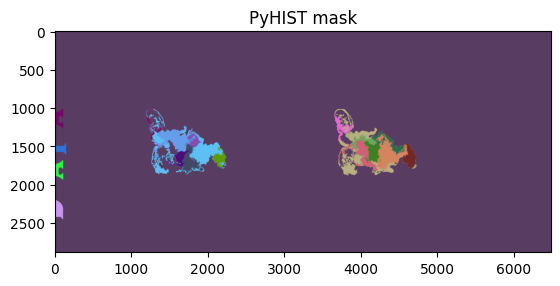

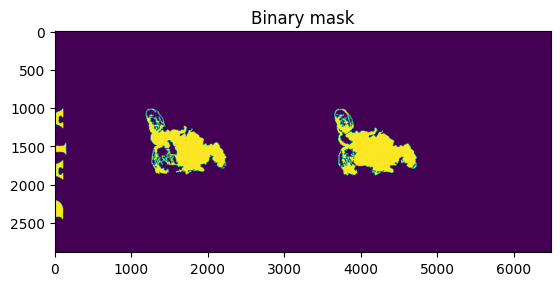

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000032365400420389.svs
((95616, 83227), (23904, 20806), (5976, 5201), (2988, 2600))
0.25209999999999999
[40.0, 9.999819766778211, 2.499834778272442, 1.2497972083856583]
Top_left


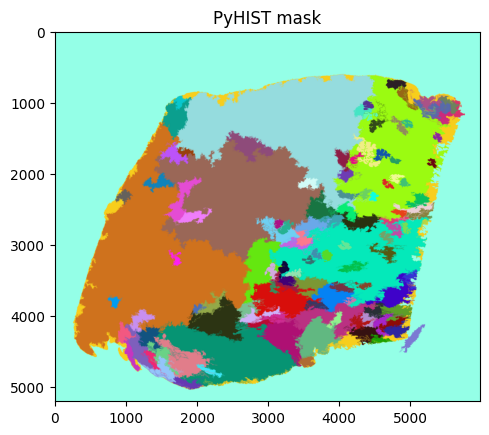

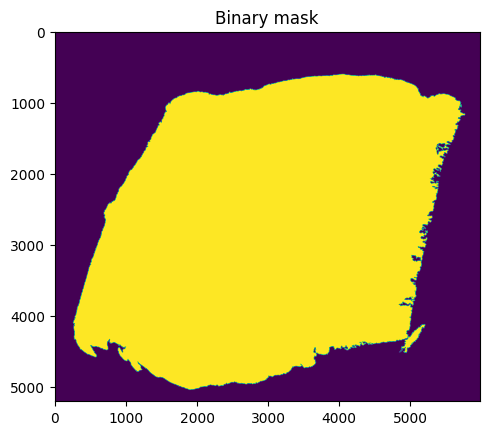

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000030508000324808.svs
((45884, 33846), (11471, 8461), (2867, 2115))
0.50049999999999994
[20.0, 4.999852267690944, 1.2497257461520914]
Top_left


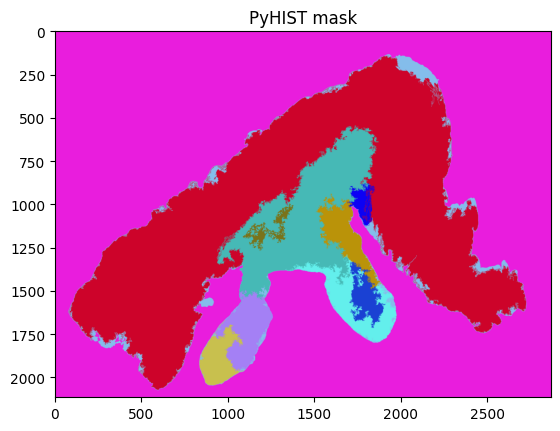

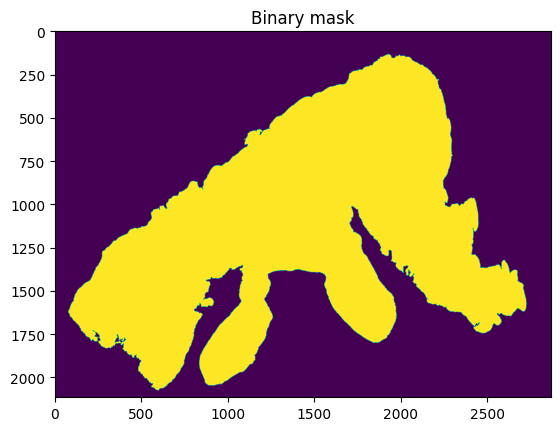

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000033646900506902.svs
((89640, 86880), (22410, 21720), (5602, 5430), (2801, 2715))
0.25280000000000002
[40.0, 10.0, 2.4998884376812884, 1.2499442188406442]
Top_left


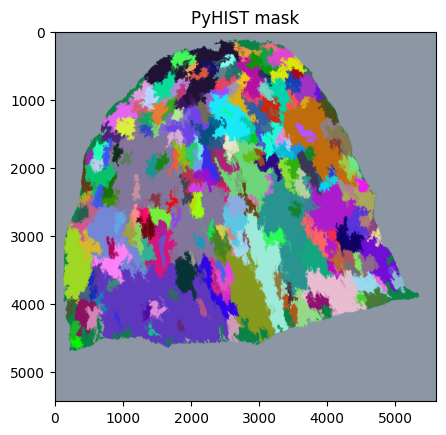

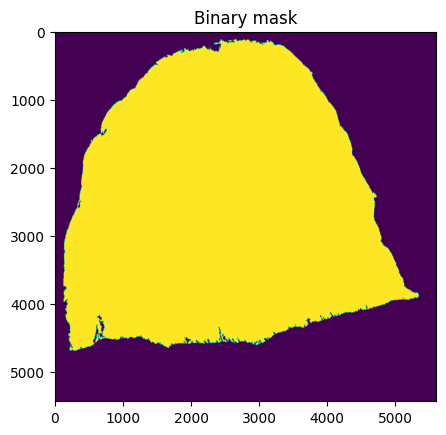

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000030640600331515.svs
((53863, 44556), (13465, 11139), (3366, 2784))
0.50049999999999994
[20.0, 4.999860753970832, 1.249750441842967]
Top_left


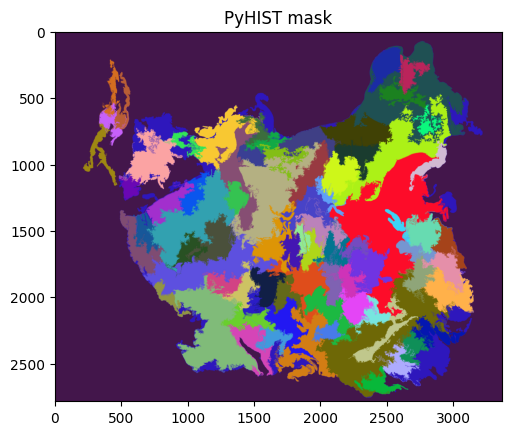

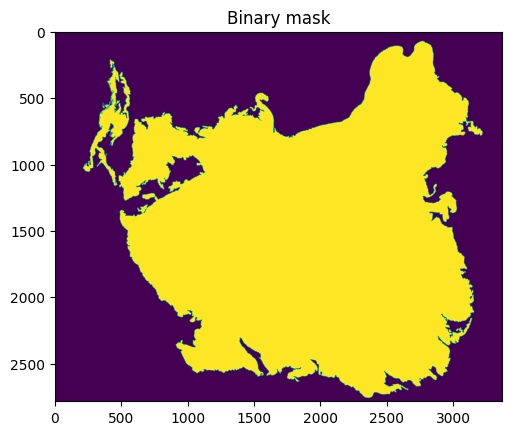

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000033377800482057.svs
((57853, 43773), (14463, 10943), (3615, 2735))
0.50049999999999994
[20.0, 4.999899674158442, 1.2496739395075038]
top_right


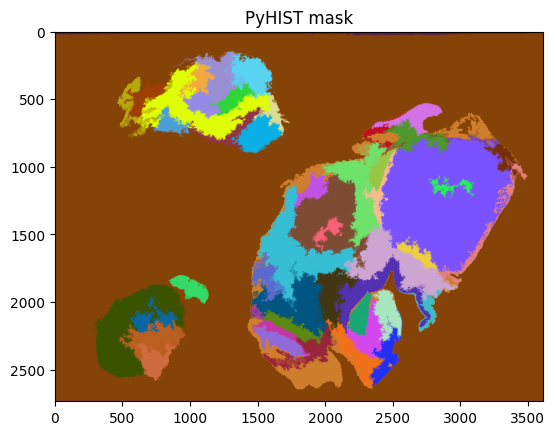

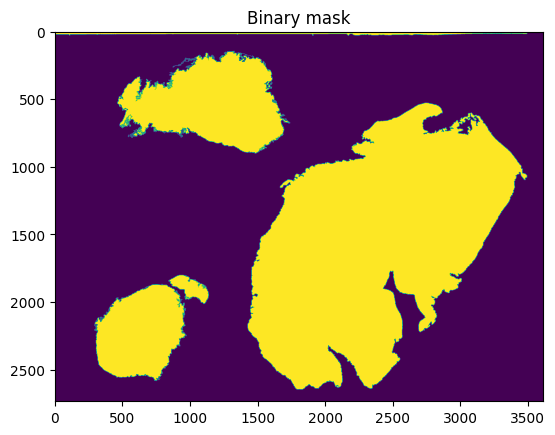

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000030963300346648.svs
((119520, 37205), (29880, 9301), (7470, 2325), (3735, 1162))
0.25209999999999999
[40.0, 9.999865607654987, 2.4998320005375985, 1.2496471252470123]
Top_left


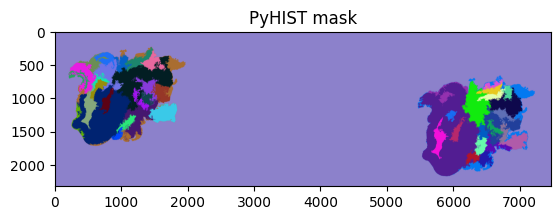

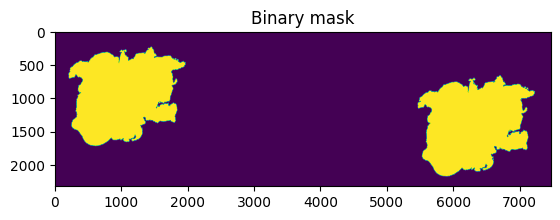

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000031340300367687.svs
((127488, 85861), (31872, 21465), (7968, 5366), (3984, 2683))
0.25209999999999999
[40.0, 9.99994176600416, 2.4999272058095583, 1.2499636029047791]
Top_left


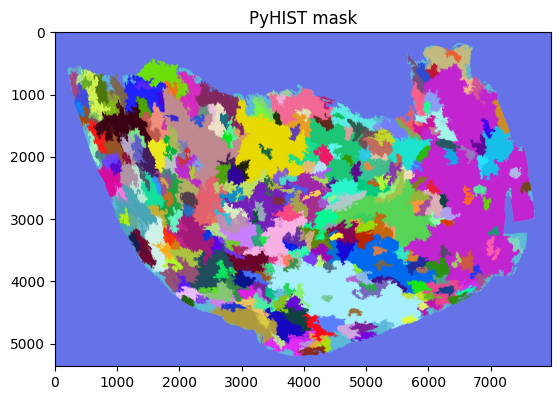

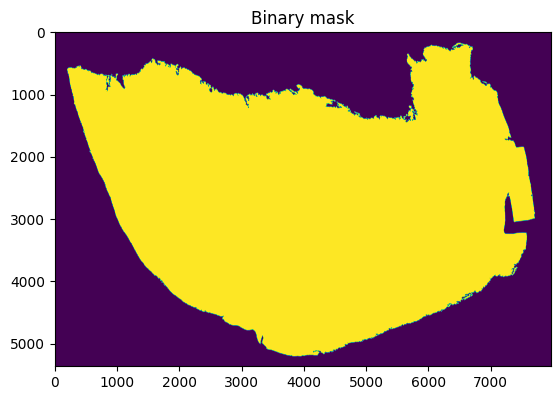

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000030689500332895.svs
((135456, 49686), (33864, 12421), (8466, 3105), (2116, 776))
0.25180000000000002
[40.0, 9.999798732011673, 2.4998490429321896, 0.6247877996645432]
Top_left


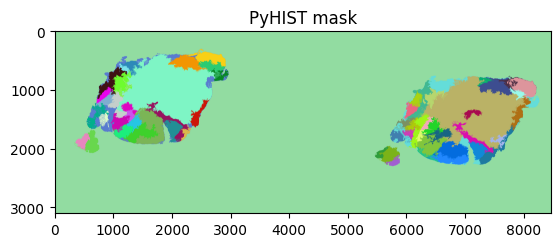

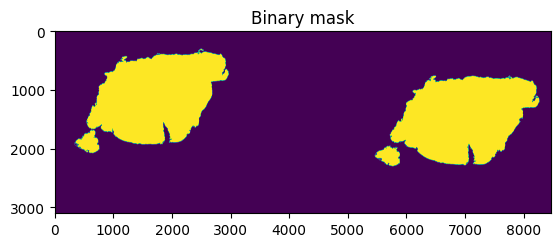

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000031548900378093.svs
((135456, 32948), (33864, 8237), (8466, 2059), (2116, 514))
0.25180000000000002
[40.0, 10.0, 2.4998482365082255, 0.6244326922226776]
Top_left


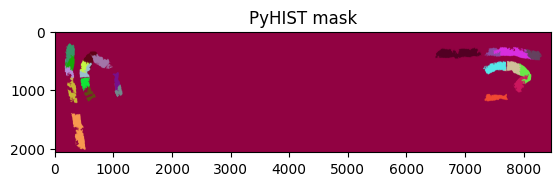

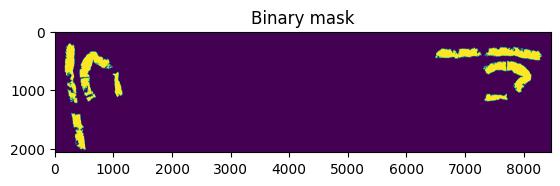

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000031539500377448.svs
((95616, 71576), (23904, 17894), (5976, 4473), (2988, 2236))
0.25180000000000002
[40.0, 10.0, 2.4998602805566423, 1.2497903974065174]
Top_left


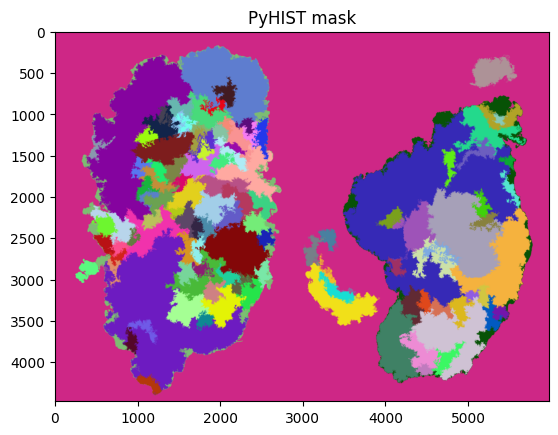

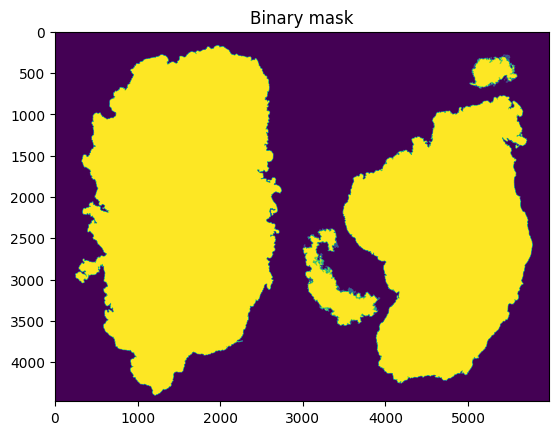

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000031106000354914.svs
((155376, 80004), (38844, 20001), (9711, 5000), (2427, 1250))
0.25209999999999999
[40.0, 10.0, 2.499937501562461, 0.6248878252973684]
Top_left


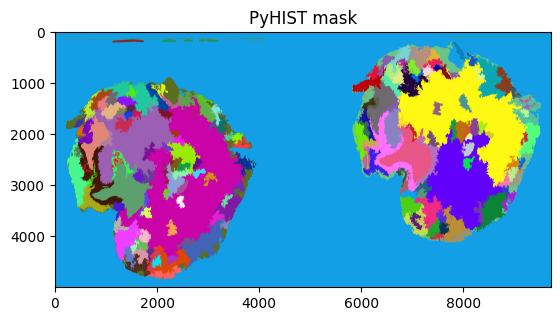

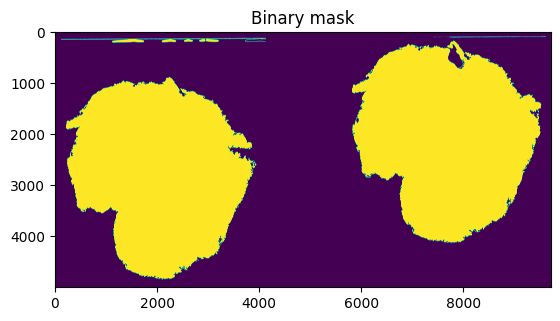

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000030689200333240.svs
((57768, 40344), (14442, 10086), (3610, 2521))
0.50229999999999997
[20.0, 5.0, 1.2497895116067783]
top_right


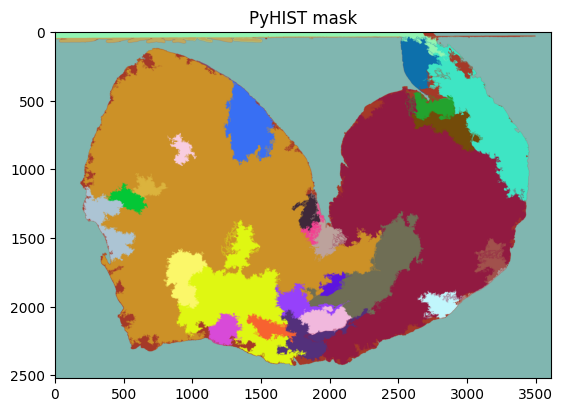

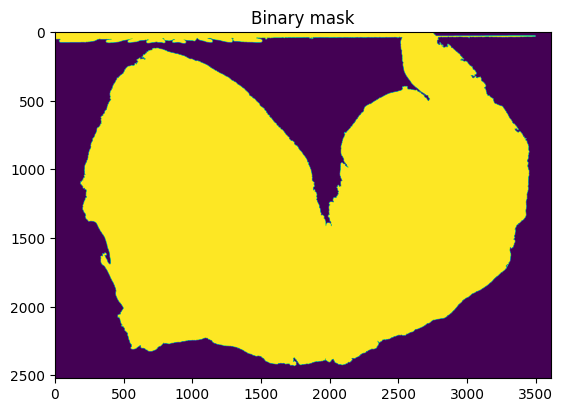

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000033646900506904.svs
((99600, 92204), (24900, 23051), (6225, 5762), (3112, 2881))
0.25280000000000002
[40.0, 10.0, 2.499837306666088, 1.249818256729422]
Top_left


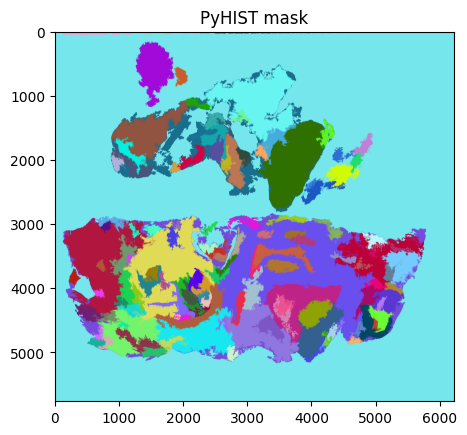

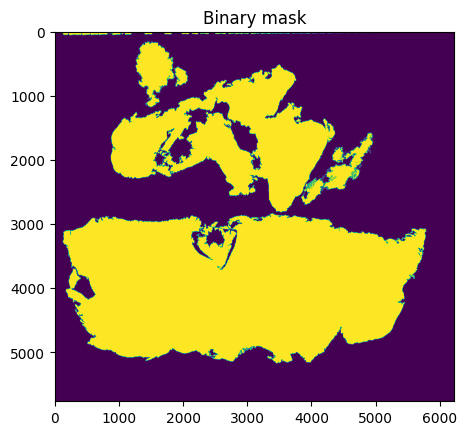

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000031539500377447.svs
((75696, 68550), (18924, 17137), (4731, 4284), (2365, 2142))
0.25180000000000002
[40.0, 9.999854118951408, 2.49989058602127, 1.2498131832342692]
Top_left


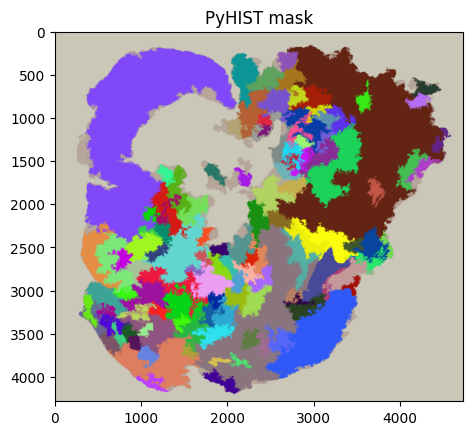

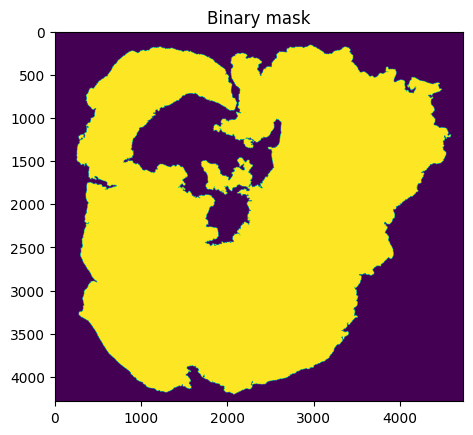

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000030734200335038.svs
((93624, 42582), (23406, 10645), (5851, 2661), (2925, 1330))
0.50229999999999997
[20.0, 4.999882576736103, 1.249858528549285, 0.6247584285476662]
top_right


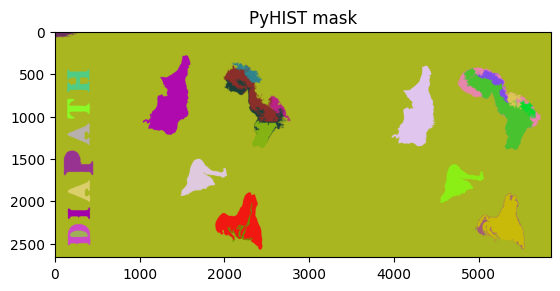

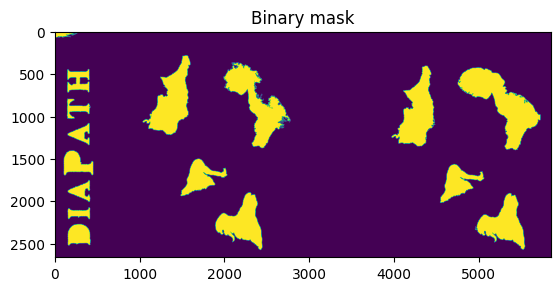

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000030487200323374.svs
((51868, 35413), (12967, 8853), (3241, 2213))
0.50049999999999994
[20.0, 4.99992940345923, 1.2497671552037022]
Top_left


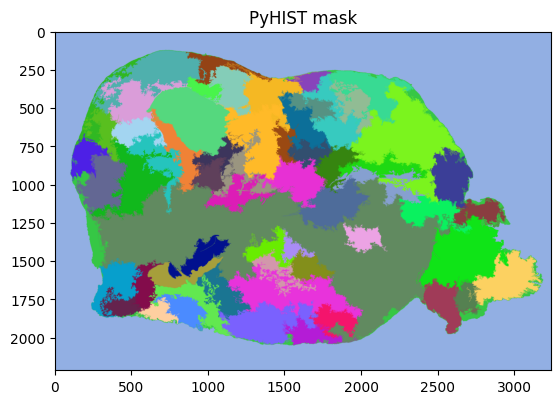

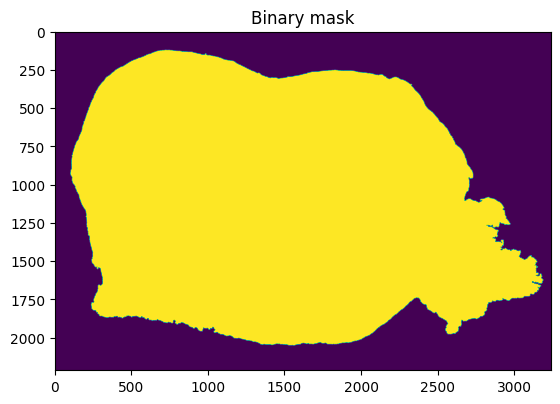

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000031888900393221.svs
((133464, 50602), (33366, 12650), (8341, 3162), (2085, 790))
0.25209999999999999
[40.0, 9.999802375447125, 2.4996780357699993, 0.6246843618851519]
Top_left


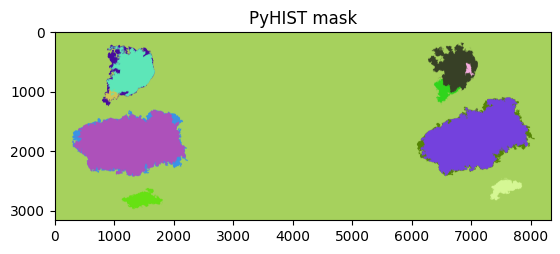

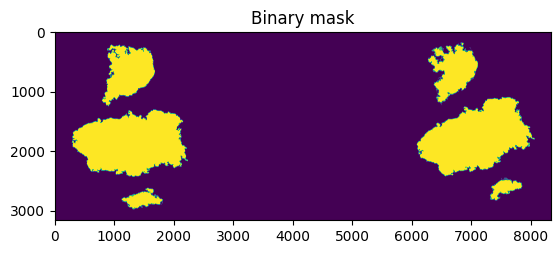

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000030487200323369.svs
((61843, 39881), (15460, 9970), (3865, 2492))
0.50049999999999994
[20.0, 4.999816037980011, 1.2498286268724854]
Top_left


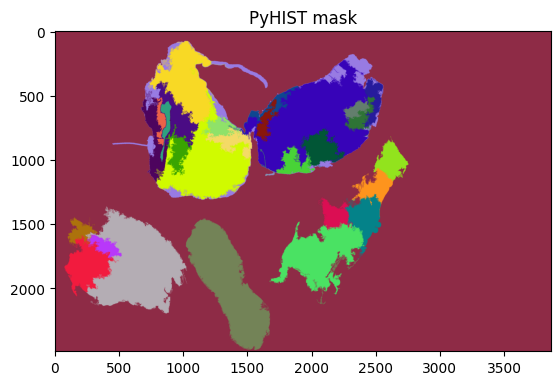

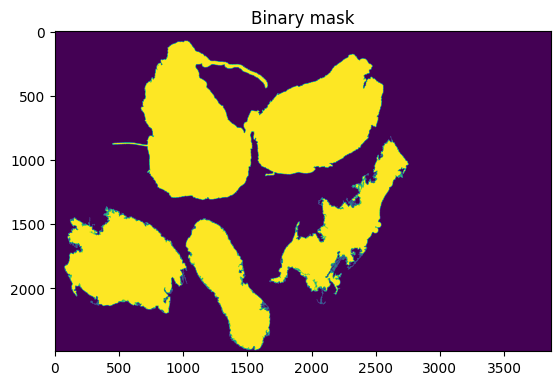

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000029496800270418.svs
((57768, 23462), (14442, 5865), (3610, 1466))
0.50229999999999997
[20.0, 4.99978688035463, 1.249753609672901]
Top_left


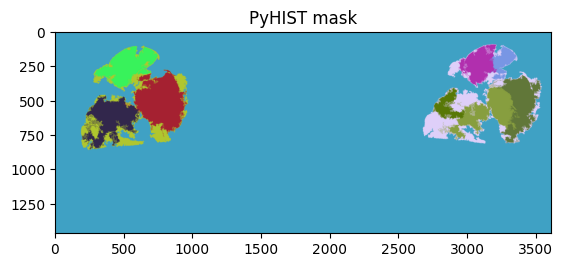

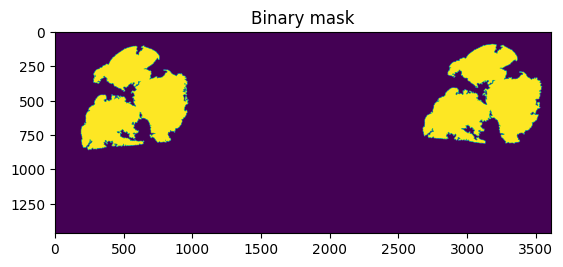

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000032209900409355.svs
((93624, 73103), (23406, 18275), (5851, 4568), (2925, 2284))
0.25209999999999999
[40.0, 9.999794805852138, 2.499636693395933, 1.2497115401417325]
Top_left


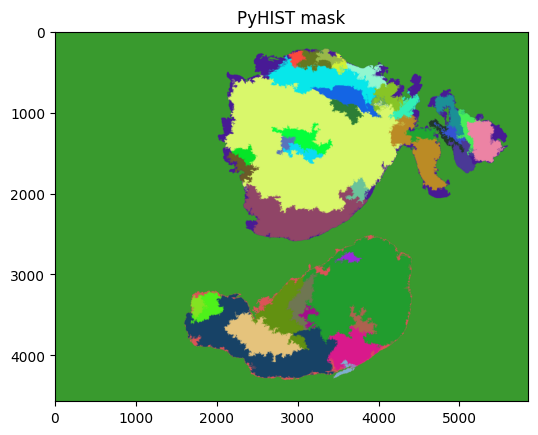

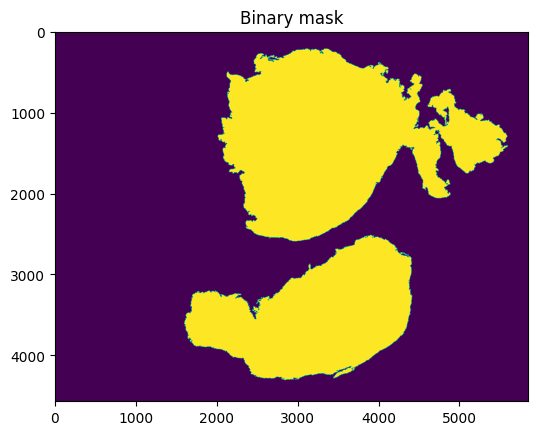

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000032367300417340.svs
((119520, 42307), (29880, 10576), (7470, 2644), (3735, 1322))
0.25280000000000002
[40.0, 9.999645436172601, 2.4999113590431503, 1.2499556795215752]
Top_left


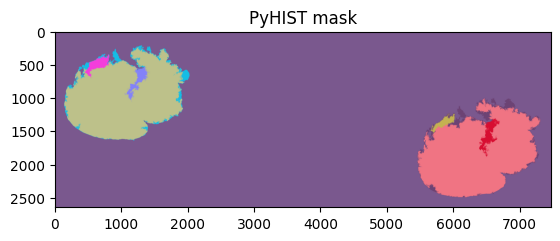

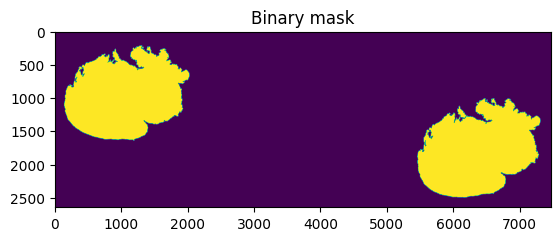

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000031206300360817.svs
((131472, 60774), (32868, 15193), (8217, 3798), (2054, 949))
0.25180000000000002
[40.0, 9.99983545324404, 2.499876585871551, 0.6247665333940843]
Top_left


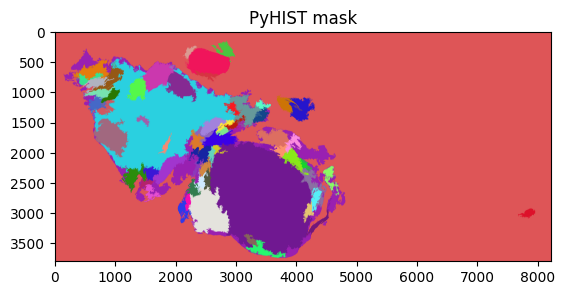

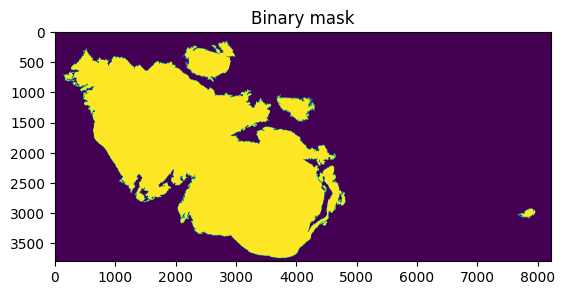

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000032365400420387.svs
((137448, 66930), (34362, 16732), (8590, 4183), (2147, 1045))
0.25209999999999999
[40.0, 9.99985058793647, 2.499889892253591, 0.62467557114357]
Top_left


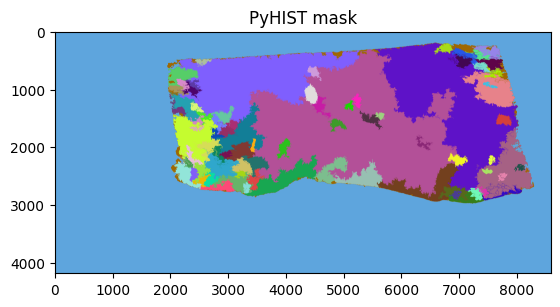

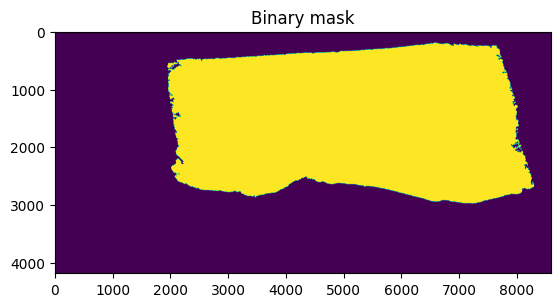

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000032365400417201.svs
((75696, 73254), (18924, 18313), (4731, 4578), (2365, 2289))
0.25209999999999999
[40.0, 9.999863486819653, 2.499897612319286, 1.2498166956406884]
Top_left


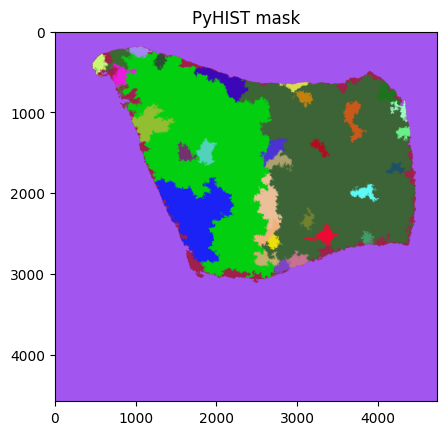

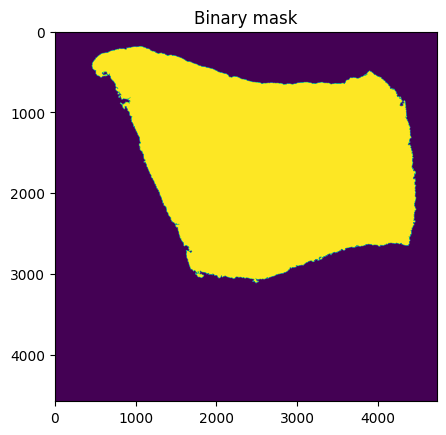

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000029488200270030.svs
((67728, 43466), (16932, 10866), (4233, 2716), (2116, 1358))
0.50229999999999997
[20.0, 4.999884964914299, 1.2498561929085845, 0.6248542800089677]
Top_left


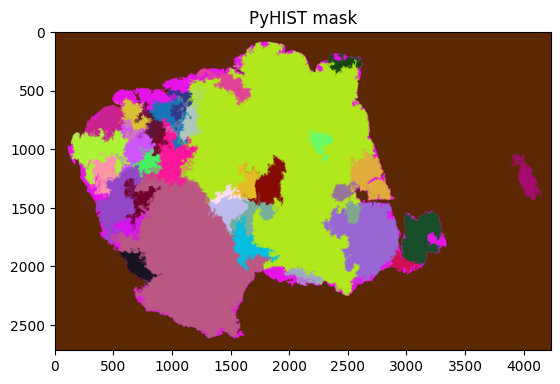

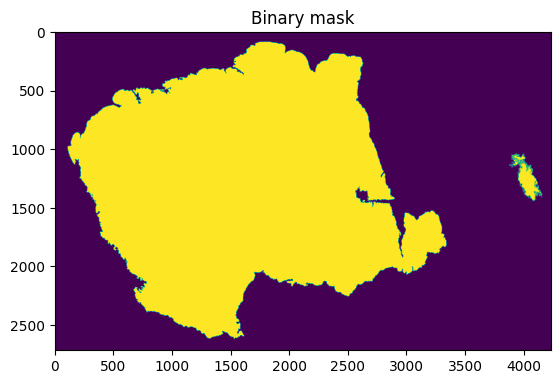

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000030798000338238.svs
((129480, 91316), (32370, 22829), (8092, 5707), (4046, 2853))
0.25180000000000002
[40.0, 10.0, 2.4998680128759667, 1.2498244889781678]
Top_left


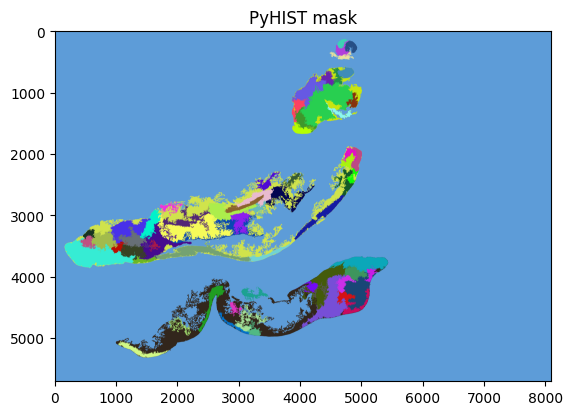

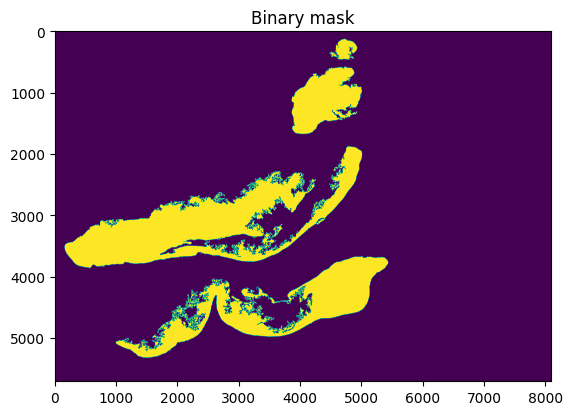

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000030303300314210.svs
((43889, 32571), (10972, 8142), (2743, 2035))
0.50049999999999994
[20.0, 4.999712765923956, 1.2497746511895953]
Top_left


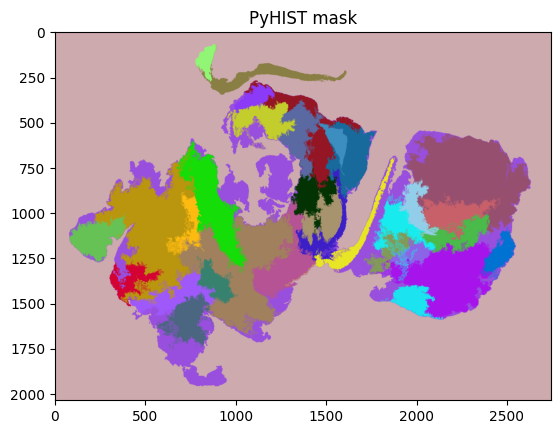

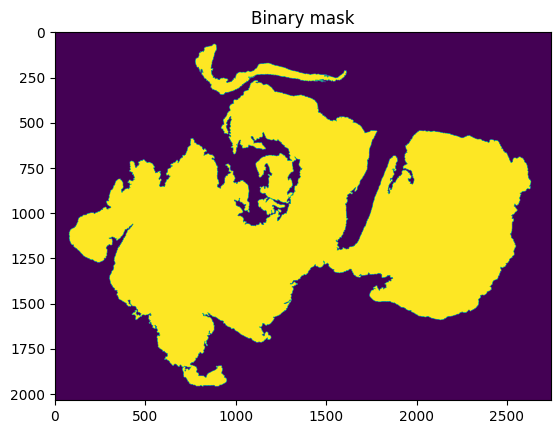

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000032373100420775.svs
((105576, 77144), (26394, 19286), (6598, 4821), (3299, 2410))
0.25180000000000002
[40.0, 10.0, 2.4997756533066475, 1.2497581818779426]
Top_left


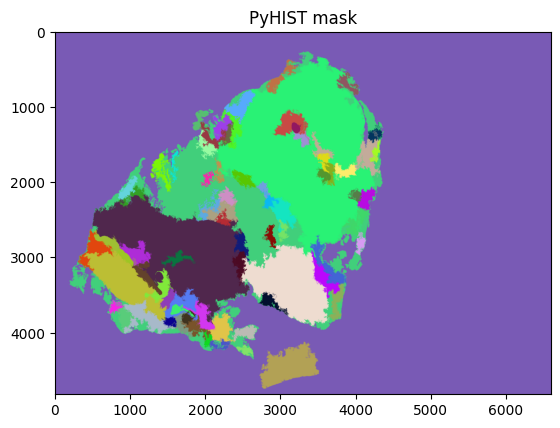

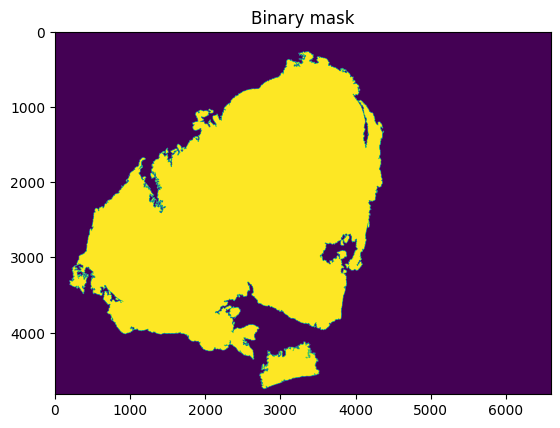

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000031505500375271.svs
((125496, 73288), (31374, 18322), (7843, 4580), (3921, 2290))
0.25209999999999999
[40.0, 10.0, 2.4997838669103687, 1.2498122481792406]
Top_left


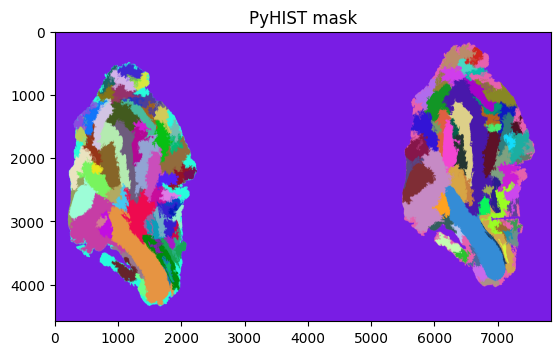

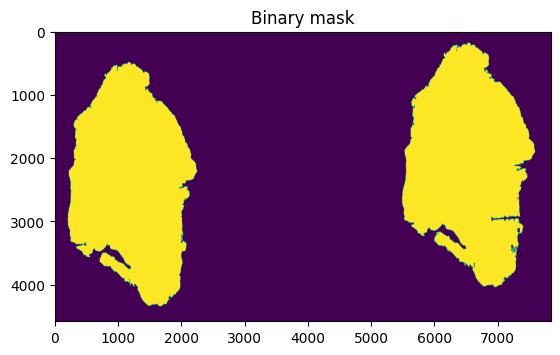

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000030490100322319.svs
((93762, 40825), (23440, 10206), (5860, 2551), (2930, 1275))
0.50049999999999994
[20.0, 4.9998854364928045, 1.249848872759992, 0.6248019140020353]
Top_left


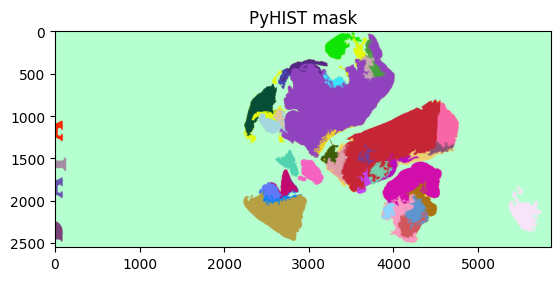

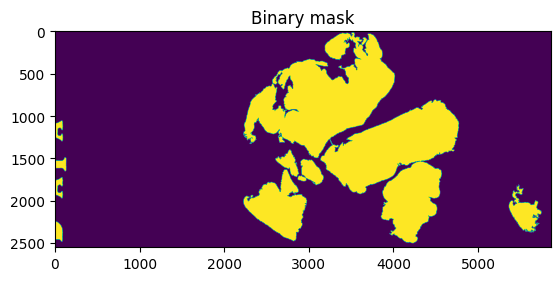

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000032835600440071.svs
((53784, 36634), (13446, 9158), (3361, 2289))
0.25180000000000002
[40.0, 9.999727022083913, 2.4994728483711626]
Top_left


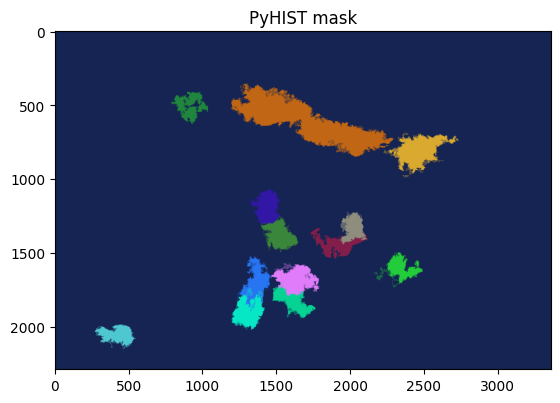

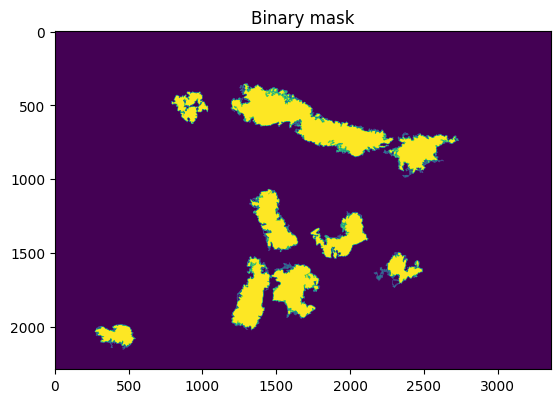

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000031226900361567.svs
((109560, 59727), (27390, 14931), (6847, 3732), (3423, 1866))
0.25209999999999999
[40.0, 9.999748850993292, 2.499594777605069, 1.2497061242096887]
Top_left


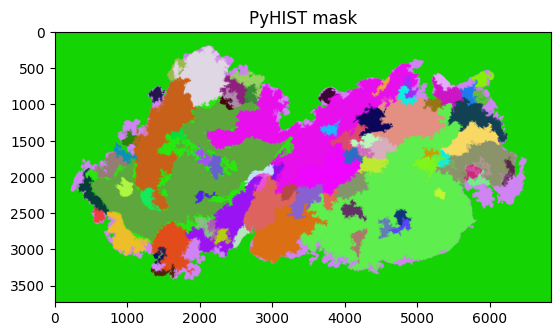

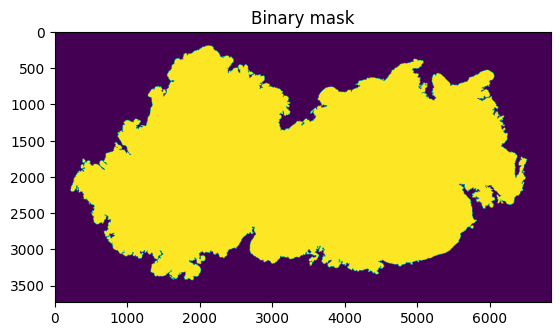

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000030717900334729.svs
((127488, 62189), (31872, 15547), (7968, 3886), (3984, 1943))
0.25209999999999999
[40.0, 9.999919599282826, 2.4997386724560764, 1.2498693362280382]
Top_left


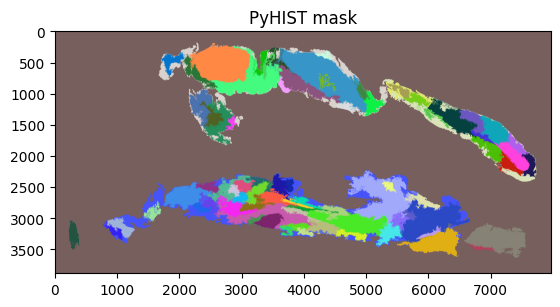

KeyboardInterrupt: 

In [58]:

datadir = Path("/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC")

for i in range(3):
	maskdir = Path(thispath.parent / "data" / "Mask_PyHIST" / f"LungAOEC_List{i+1}")

	images = os.listdir(maskdir)

	for image in images:

		svs_file = [i for i in datadir.rglob("*.svs") if "LungAOEC" in str(i) and image in str(i)]

		histo_mask = cv.imread(str(Path(maskdir / image / f"segmented_{image}.ppm")))
		print(svs_file[0])
		slide = openslide.OpenSlide(str(svs_file[0]))
		print(slide.level_dimensions)
		mpp = slide.properties['openslide.mpp-x']
		print(mpp)

		level_downsamples = slide.level_downsamples
		mags = available_magnifications(mpp, level_downsamples)
		print(mags)

		# Mask from PyHIST to binary mask
		copy = histo_mask.copy()

		most_frequnt = check_corners(copy)
		copy[(copy != most_frequnt).any(axis=-1)] = 1
		copy[(copy == most_frequnt).all(axis=-1)] = 0
		binary_mask = copy[:, :, 0]
		
		plt.imshow(histo_mask)
		plt.title("PyHIST mask")
		plt.show()


		plt.imshow(binary_mask)
		plt.title("Binary mask")
		plt.show()